In [5]:
# Carregar as bibliotecas necessárias
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import sequence

In [6]:
# alterar a geração de números aleatórios para reproducibilidade
np.random.seed(0)

In [5]:
# Definir o número de features
number_of_features = 1000

In [6]:
# Carregar o conjunto de dados
(data_train, target_train), (data_test, target_test) = keras.datasets.imdb.load_data(num_words=number_of_features)

In [7]:
# Fazer com que cada observação tenha no máximo 400 features
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

In [8]:
# Inicializar a rede neural
network = models.Sequential()

In [16]:
# Adicionar uma camada do tipo Embedding
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

In [17]:
# Adicionar uma camada do tipo Long Short-Term Memory (LSTM) com 128 unidades
network.add(layers.LSTM(units=128))

In [18]:
# Adicionar uma camada totalmente conectada com uma função de ativação sigmoide
network.add(layers.Dense(units=1, activation="sigmoid"))

In [19]:
# Compilar a rede neural
network.compile(loss="binary_crossentropy", # Função de perda: entropia cruzada binária
                optimizer="Adam", # Otimizador: Adam
                metrics=["accuracy"] # Métrica de desempenho: acurácia
)

In [21]:
# Treinar a rede neural
history = network.fit(features_train, # Features de treinamento
                      target_train, # Target de treinamento
                      epochs=3, # Número de épocas
                      verbose=1, # Exibir mensagens de progresso
                      batch_size=1000, # Tamanho do batch
                      validation_data=(features_test, target_test)) # Dados de validação

Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6881 - loss: 0.5942 - val_accuracy: 0.7747 - val_loss: 0.4757
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7935 - loss: 0.4517 - val_accuracy: 0.7865 - val_loss: 0.4547
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8153 - loss: 0.4114 - val_accuracy: 0.8423 - val_loss: 0.3694


In [26]:
# Avaliar o modelo
test_loss, test_acc = network.evaluate(features_test, target_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.8419 - loss: 0.3706


In [27]:
# Mostrar os dados acima
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.8423200249671936

Test loss: 0.3693993389606476


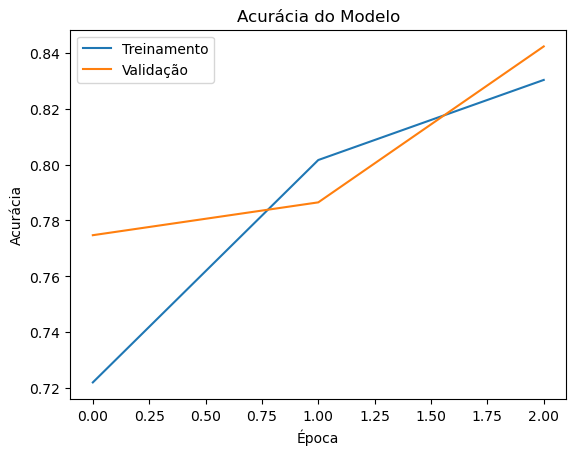

In [23]:
# Mostre em gráfico a acurácia de treinamento e validação
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

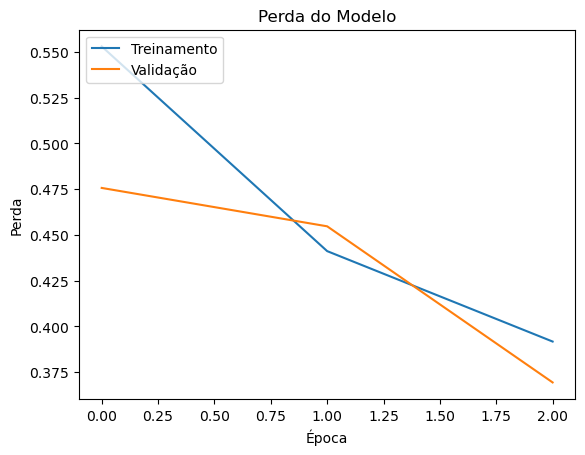

In [25]:
# Mostre em gráfico a perda de treinamento e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()